<a href="https://colab.research.google.com/github/Ejay123-tech/Ejay123-tech/blob/main/FUTURE_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUTURE_DS_01**

This notebook demonstrates the process of data cleaning and exploratory data analysis  on the Titanic dataset. The aim is to identify patterns, trends, and relationships between variables to gain insights about the passengers and factors influencing survival rates.

The Titanic dataset contains information about passengers, including their demographics, ticket class, fare, and survival status.

**Key Steps in This Notebook:**
1. Importing necessary libraries
2. Loading and describing the dataset
3. Cleaning the data (handling missing values, duplicates, and irrelevant columns)
4. Performing EDA to explore relationships and trends
5. Summarizing key insights

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## **Loading and Describing the Dataset**

The Titanic dataset includes the following key variables:
- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Survival status (0 = No, 1 = Yes).
- **Pclass**: Ticket class (1 = First, 2 = Second, 3 = Third).
- **Name**: Name of the passenger.
- **Sex**: Gender of the passenger.
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings/spouses aboard.
- **Parch**: Number of parents/children aboard.
- **Ticket**: Ticket number.
- **Fare**: Fare paid for the ticket.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).




In [25]:
# Load dataset
titanic = pd.read_csv('/content/titanc.csv',index_col = 0)
# Display the first few rows of the dataset
titanic.head()



,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Passengerid,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
2,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
3,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
4,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
5,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   zero      1309 non-null   int64  
 5   zero.1    1309 non-null   int64  
 6   zero.2    1309 non-null   int64  
 7   zero.3    1309 non-null   int64  
 8   zero.4    1309 non-null   int64  
 9   zero.5    1309 non-null   int64  
 10  zero.6    1309 non-null   int64  
 11  Parch     1309 non-null   int64  
 12  zero.7    1309 non-null   int64  
 13  zero.8    1309 non-null   int64  
 14  zero.9    1309 non-null   int64  
 15  zero.10   1309 non-null   int64  
 16  zero.11   1309 non-null   int64  
 17  zero.12   1309 non-null   int64  
 18  zero.13   1309 non-null   int64  
 19  zero.14   1309 non-null   int64  
 20  Pclass    1309 non-null   int64  
 

In [29]:
# Rename the column '2urvived' to 'Survived'
titanic.rename(columns={'2urvived': 'Survived'}, inplace=True)

# Verify the change
print(titanic.columns)


Index(['Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3',
       'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9',
       'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass',
       'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', 'Survived'],
      dtype='object')


## Data Cleaning

Before conducting EDA, the dataset needs to be cleaned. The following cleaning steps will be performed:
1. Handling missing values.
2. Dropping irrelevant or redundant columns.
3. Converting categorical data into numerical formats (if required).
4. Removing duplicate rows (if any).


In [8]:
 # Checking for missng values in the data
 print(titanic.isnull().sum())

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [10]:
# Impute or drop missing values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])


In [11]:
# Drop duplicate rows
titanic.drop_duplicates(inplace=True)


In [20]:
# Standardize column names (remove spaces and make lowercase)
titanic.columns = titanic.columns.str.strip()  # Remove leading/trailing spaces
print(titanic.columns)

# Rename 'survived' to 'Survived' (if needed)
titanic.rename(columns={'survived': 'Survived'}, inplace=True)


Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')


## Exploratory Data Analysis (EDA)

EDA involves summarizing and visualizing the main characteristics of the data to identify patterns, relationships, and trends.

Key questions to explore:
1. What is the survival rate among passengers?
2. How do survival rates differ by gender, age, and passenger class?
3. Are there any significant correlations between numerical variables?


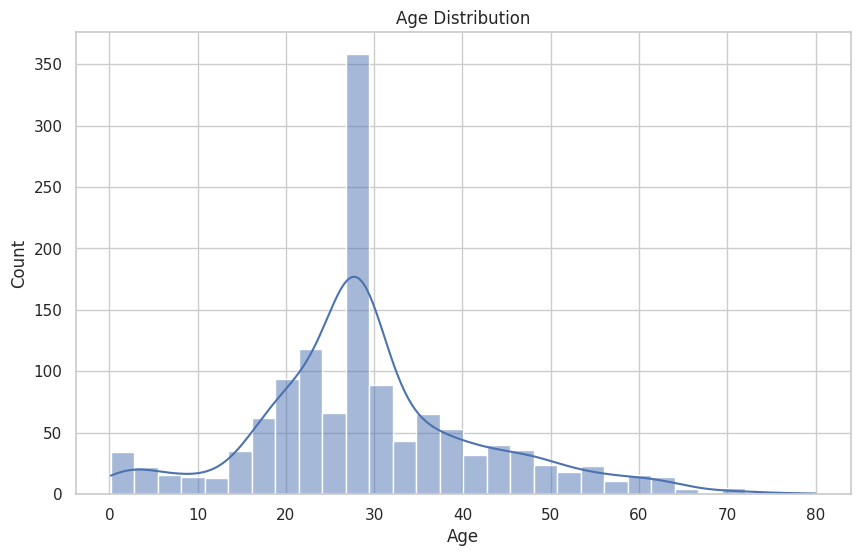

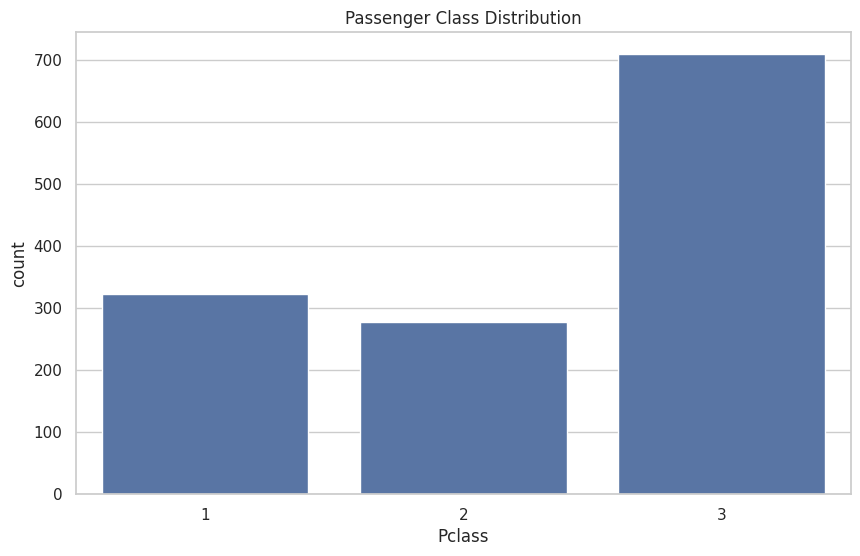

In [30]:
# Visualize Age distribution
sns.histplot(titanic['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Analyze categorical variables
sns.countplot(data=titanic, x='Pclass')
plt.title('Passenger Class Distribution')
plt.show()


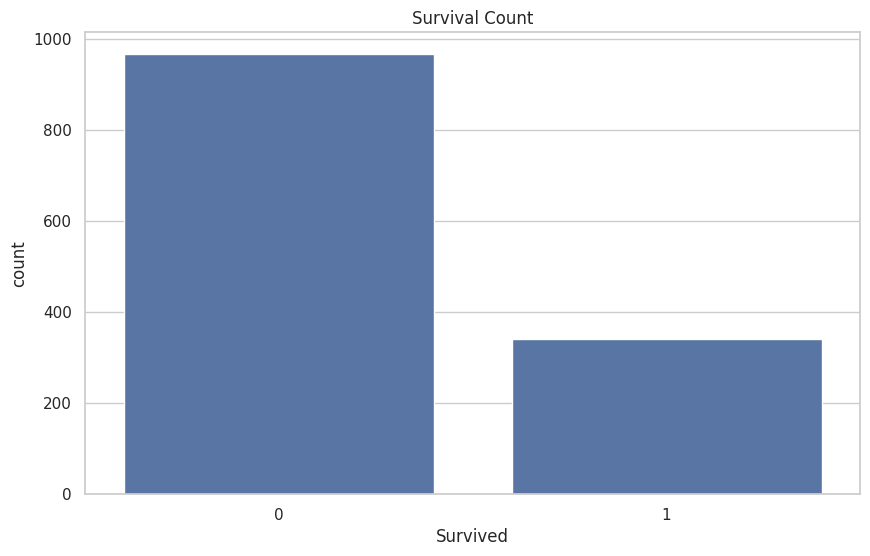

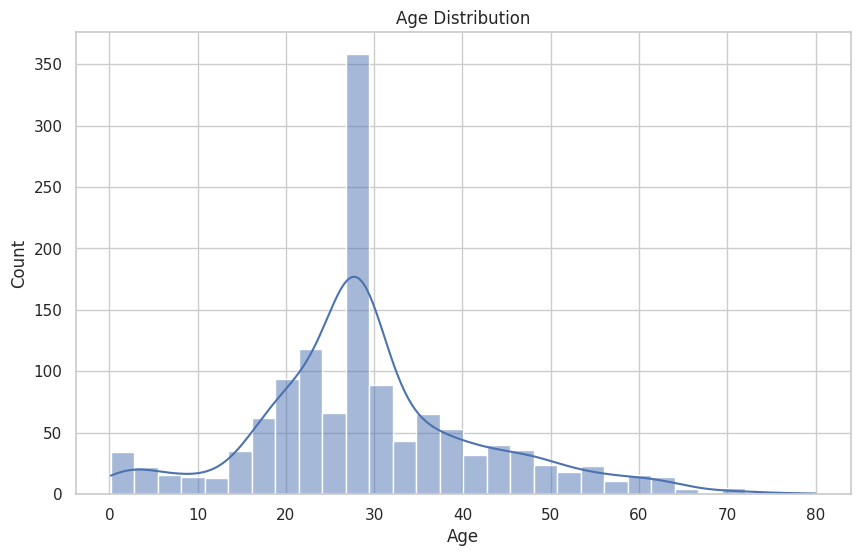

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival Count
sns.countplot(data=titanic, x='Survived')
plt.title('Survival Count')
plt.show()

# Age Distribution
sns.histplot(titanic['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


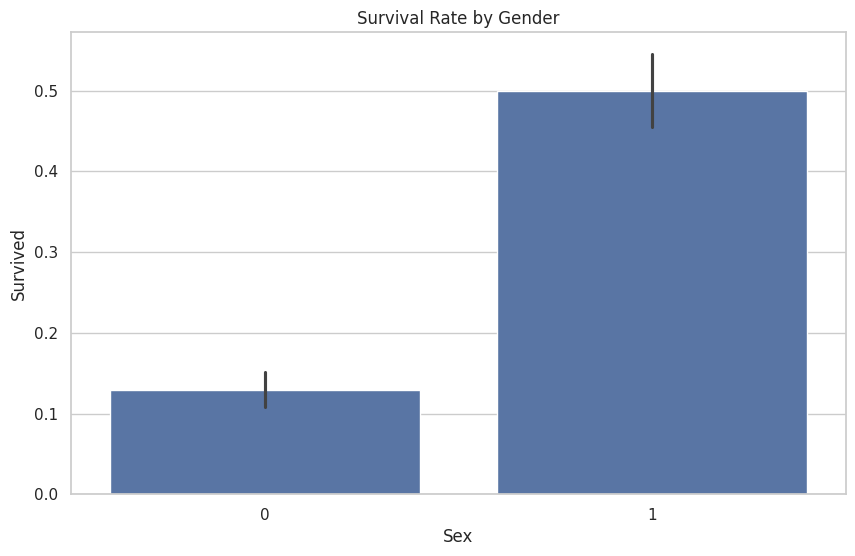

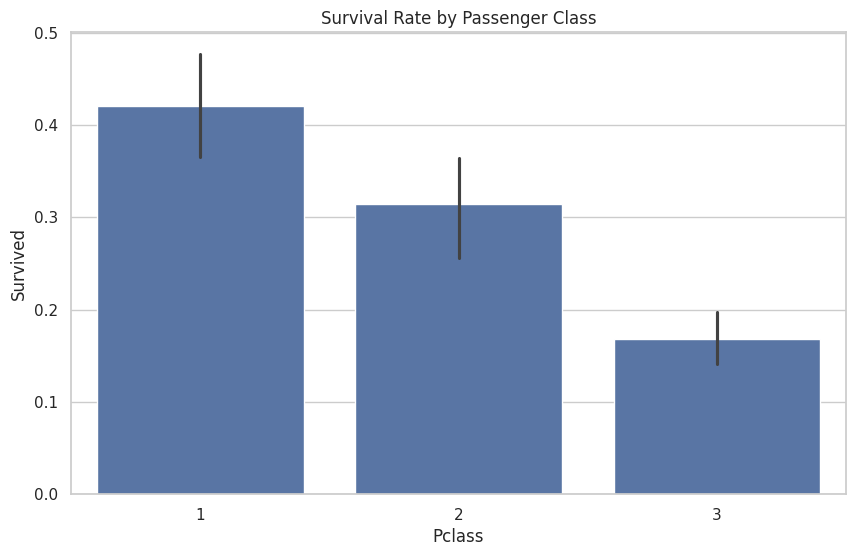

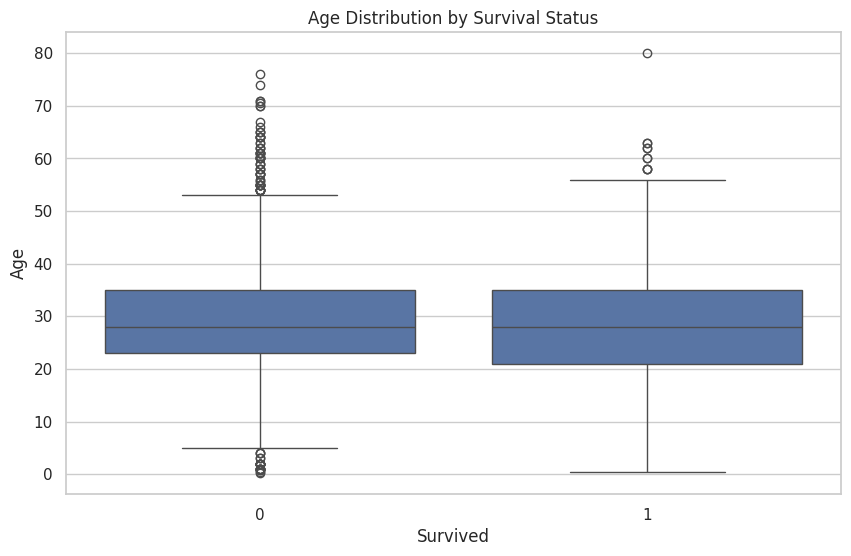

In [32]:
# Survival Rate by Gender
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by Pclass
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age vs Survival
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()


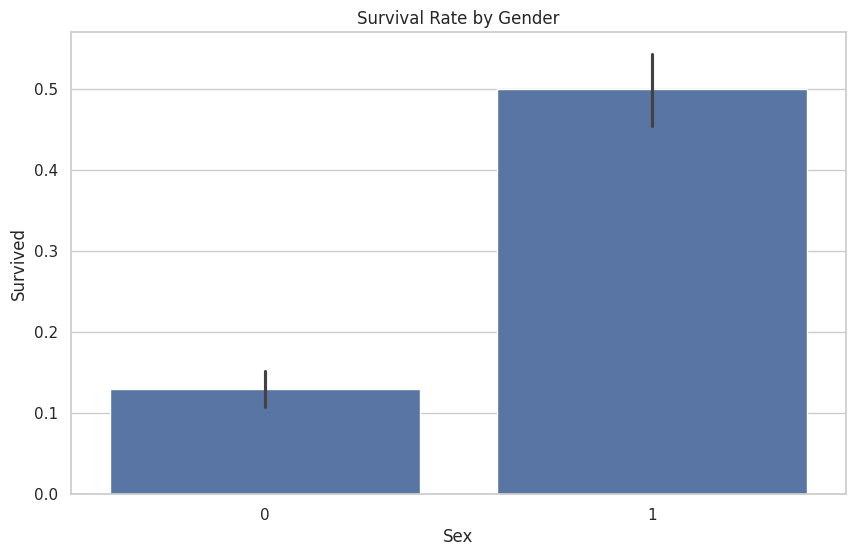

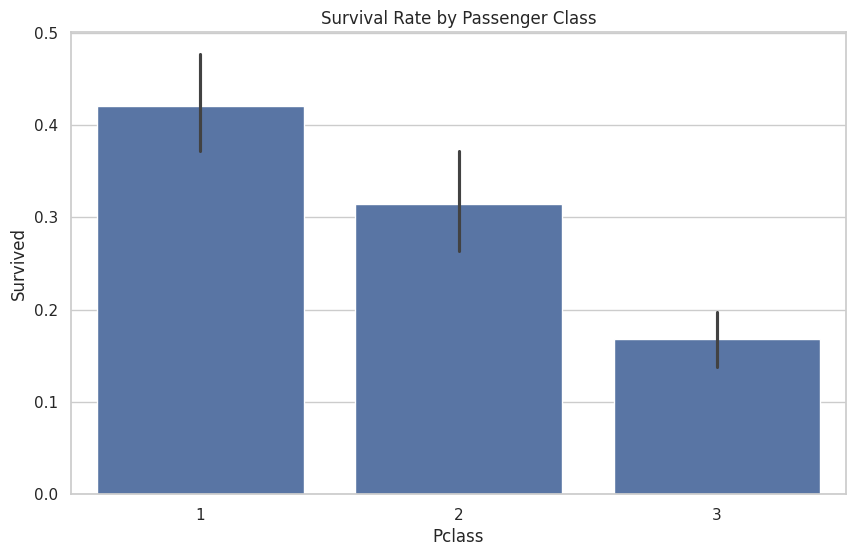

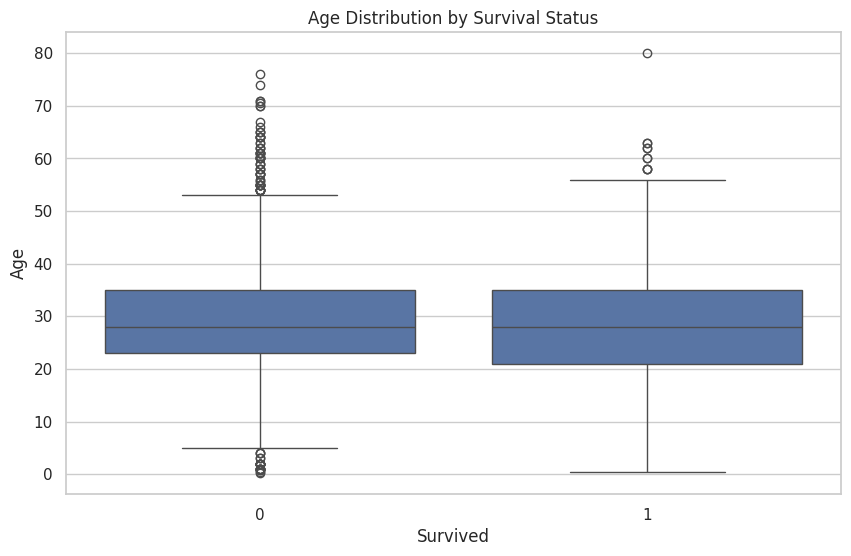

In [34]:
# Survival Rate by Gender
sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

# Survival Rate by Passenger Class
sns.barplot(data=titanic, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age vs Survival
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()


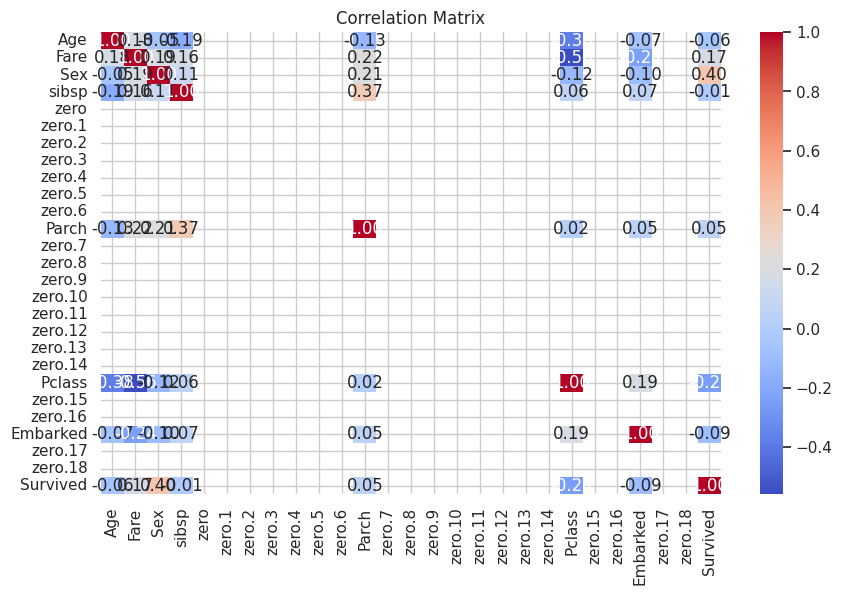

In [35]:
# Correlation Heatmap
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## **Insights and Conclusion**

### Key Findings:
1. **Survival Rate**: The overall survival rate is significantly lower than the death rate.
2. **Gender and Survival**: Females have a much higher survival rate compared to males.
3. **Class and Survival**: Passengers in first class have the highest survival rates, followed by second class, with third class having the lowest.
4. **Age and Survival**: Younger passengers have a slightly higher chance of survival.

### Next Steps:
1. Further analysis on fare and ticket details.
2. Build predictive models using this cleaned dataset.


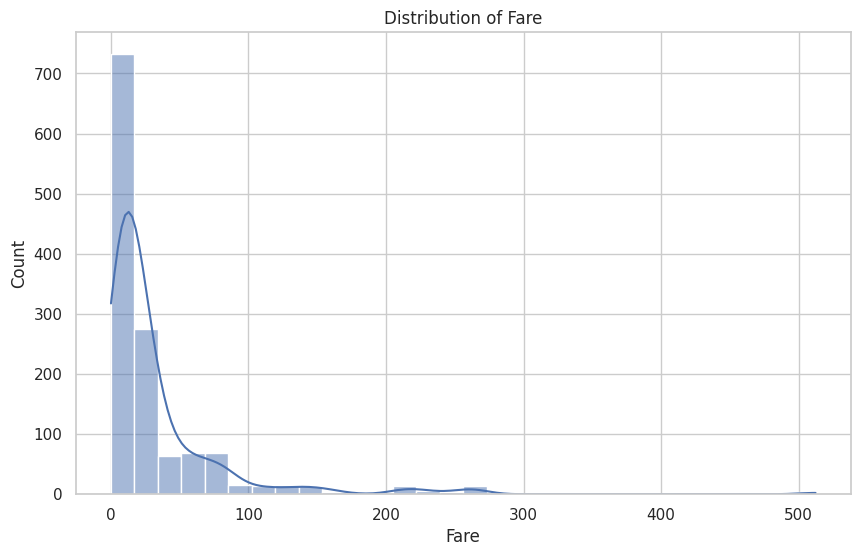

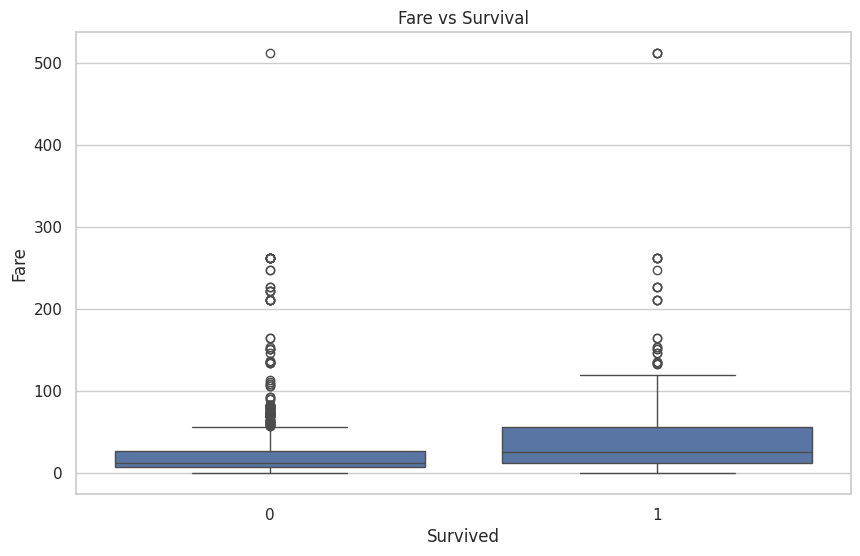

In [36]:
# Distribution of Fare
sns.histplot(titanic['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.show()



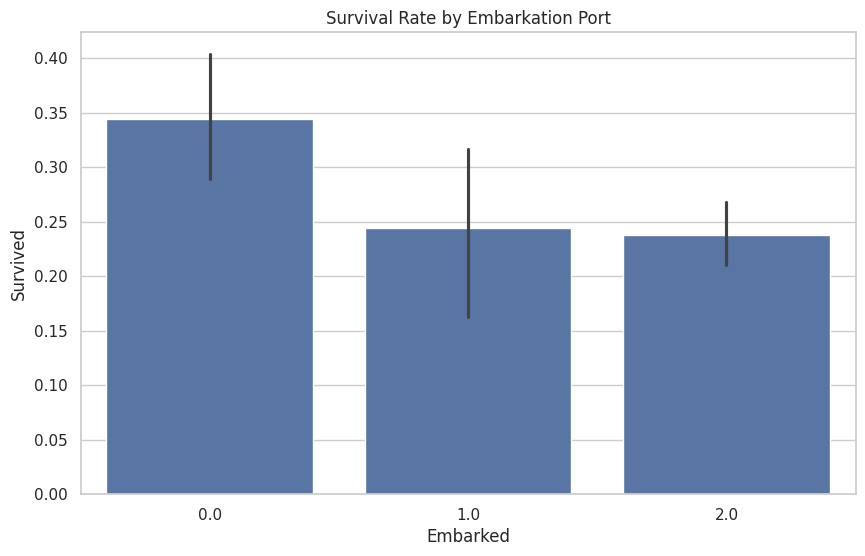

In [38]:
# Survival rate by Embarkation Port
sns.barplot(data=titanic, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Port')
plt.show()

